In [ ]:
IMG_SHAPE = (32,32,3)
Z_DIM = 128

170508288/170498071 [==============================] - 2s 0us/step


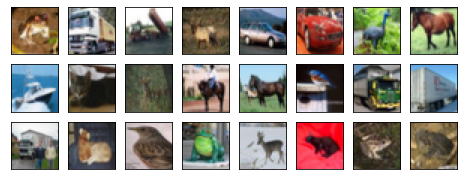

(50000, 32, 32, 3)

In [ ]:
# 데이터 로드
from data_loader import *
from utils import display_sample_img
x_train, _, _, _ = cifar10_loader(True)
display_sample_img(x_train, (3,8), True)
x_train.shape

In [ ]:
# 모델 구성
from model import BuildModel
builder = BuildModel(IMG_SHAPE, Z_DIM)
gene = builder.build_gene(last_activation='tanh') # tanh : -1 ~ 1 아웃풋  sigmoid: 0~1 아웃풋
disc = builder.build_disc()
gene.summary()
disc.summary()

Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense (Dense)               (None, 8192)              1056768   
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 128)        512       
 ormalization)                                                   
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 64)       204864    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       25

Model: "GAN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128)]             0         
                                                                 
 Generator (Functional)      (None, 32, 32, 3)         1267203   
                                                                 
 Discriminator (Functional)  (None, 1)                 217985    
                                                                 
Total params: 1,485,188
Trainable params: 1,266,819
Non-trainable params: 218,369
_________________________________________________________________


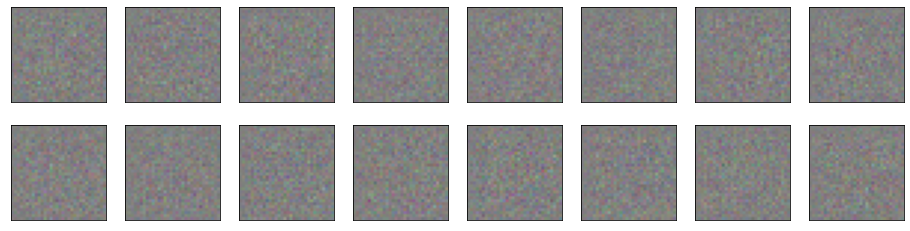

* epoch: 2, d_loss: 216.612436, g_loss: 7310.170751


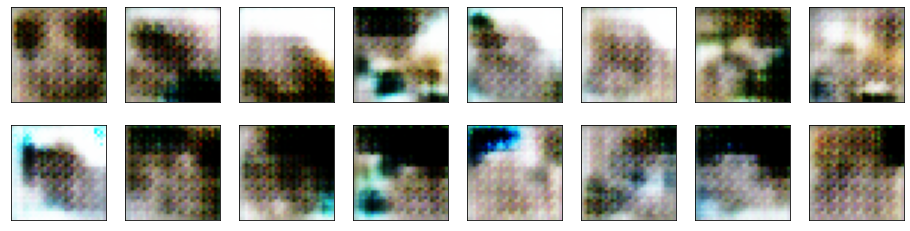

* epoch: 3, d_loss: 241.612438, g_loss: 7466.932570


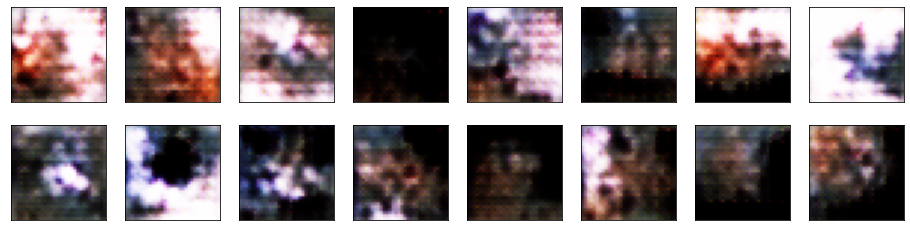

* epoch: 4, d_loss: 247.995985, g_loss: 7702.368968


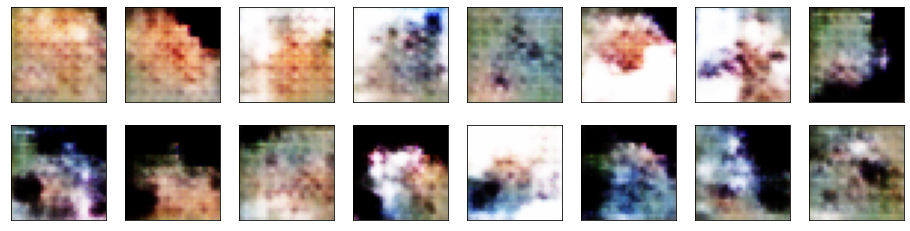

* epoch: 5, d_loss: 234.758412, g_loss: 7749.671731


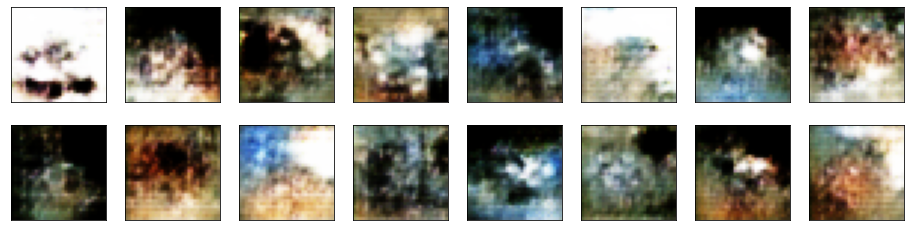

In [ ]:
# 학습
from gan import GAN
model = GAN(gene, disc, IMG_SHAPE, Z_DIM)
model.compile()
model.gan.summary()
model.fit(x_train,  epochs= 5, standard=True)